In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

import skimage.io, skimage.exposure

from neural_gas import vGNG, vNG, vSOM
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import os, shutil

In [2]:
n_samples = 2000
dataset_type = 'circles'
data = None
if dataset_type == 'blobs':
    data = datasets.make_blobs(n_samples=n_samples, random_state=8)
elif dataset_type == 'moons':
    data = datasets.make_moons(n_samples=n_samples, noise=.05)
elif dataset_type == 'circles':
    data = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
data = StandardScaler().fit_transform(data[0])

   Pass #1
   Pass #2
   Pass #3
   Pass #4
   Pass #5
   Pass #6
   Pass #7
   Pass #8
Found 2 clusters.


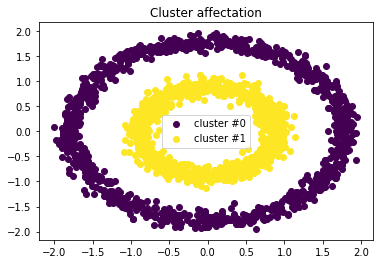

In [3]:
if os.path.exists('visualization/sequence'):
        shutil.rmtree('visualization/sequence')
os.makedirs('visualization/sequence')

gng = vGNG(data)
gng.fit(.1, .006, 32, 500, .618, .995, 8, plot_evolution=True)
gng.update_clusters(outlier_tolerance = 2)
print('Found %d clusters.' % len(gng.clusters))
gng.plot_clusters()

   Pass #1
   Pass #2
   Pass #3
   Pass #4
Found 2 clusters.


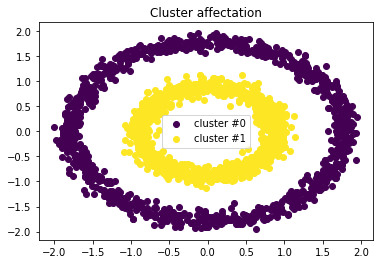

In [4]:
if os.path.exists('visualization/sequence'):
        shutil.rmtree('visualization/sequence')
os.makedirs('visualization/sequence')

ng = vNG(data, 40)
ng.fit(.1, .36, 32, 500, 0.98, 4, plot_evolution=True)
ng.update_clusters(outlier_tolerance = 2)
print('Found %d clusters.' % len(ng.clusters))
ng.plot_clusters()

   Pass #1
   Pass #2
   Pass #3
   Pass #4
   Pass #5
   Pass #6
   Pass #7
   Pass #8
Found 2 clusters.


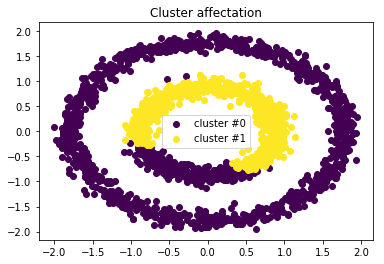

In [5]:
if os.path.exists('visualization/sequence'):
        shutil.rmtree('visualization/sequence')
os.makedirs('visualization/sequence')

def som1_init(W, C, *whatever):
    W[:] = np.array([
        [-1.5,1.5],   # 0
        [0,1.5],      # 1
        [1.5,1.5],    # 2
        [1.5,0],      # 3
        [1.5,-1.5],   # 4
        [0,-1.5],     # 5
        [-1.5,-1.5],  # 6
        # ---------------
        [-1,0],       # 7
        [0,0.5],      # 8
        [1,0],        # 9
    ])
    
    C[:] = np.array([
        [0,1,0,0,0,0,0,0,0,0],
        [0,0,1,0,0,0,0,0,0,0],
        [0,0,0,1,0,0,0,0,0,0],
        [0,0,0,0,1,0,0,0,0,0],
        [0,0,0,0,0,1,0,0,0,0],
        [0,0,0,0,0,0,1,0,0,0],
        [1,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,1,0],
        [0,0,0,0,0,0,0,0,0,1],
        [0,0,0,0,0,0,0,1,0,0],
    ], dtype = bool)

som = vSOM(data, 10j)
som.reconnect(som1_init)
som.fit(.1, .003, 200, 0.98, 8, plot_evolution=True)
som.update_clusters(outlier_tolerance = 2)
print('Found %d clusters.' % len(som.clusters))
som.plot_clusters()